In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)

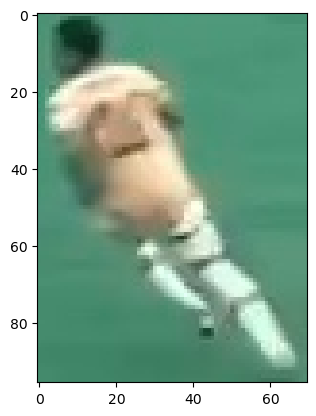

In [17]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


In [18]:
image.shape

(96, 70, 3)

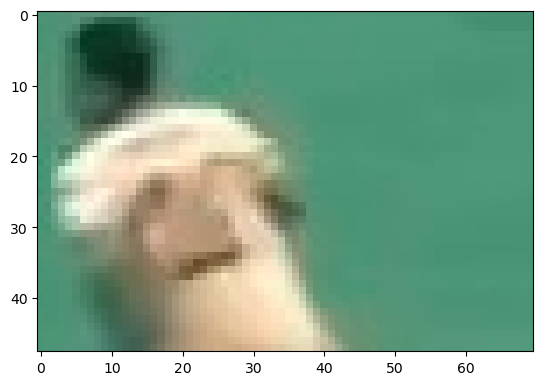

In [19]:
## Taking top half of the image 
top_half_image = image[0:int(image.shape[0]/2), :] 
plt.imshow(top_half_image)

In [20]:
from sklearn.cluster import KMeans

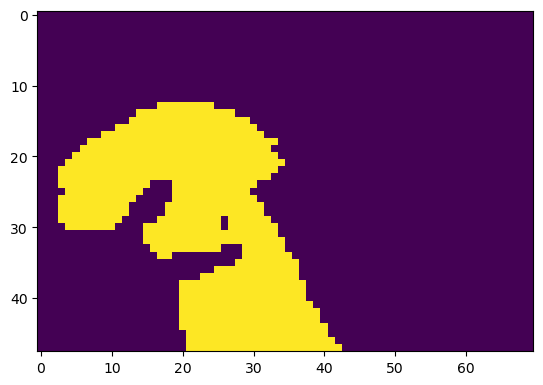

In [22]:
## Removing the background color from player T-shirt 

# CLusitering the image into two categories 
image_2d = top_half_image.reshape(-1,3) 

## Performing k-means 
kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(image_2d)

# Get the cluster labels 
labels = kmeans.labels_ 

## Reshape the labels into the original image shape 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [27]:
corners_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corners_clusters), key=corners_clusters.count)
print(non_player_cluster)

0


In [28]:
player_cluster = 1-non_player_cluster 
print(player_cluster)

1


### I am doing this to know which number does it assinged for player

In [1]:
!pip install -q inference-gpu
!pip install -q trackers[deepsort]==2.0.0rc2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.35.99 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
basemap 1.4.1 requires numpy<1.27,>=1.21; python_version >= "3.8", but you have numpy 2.2.6 which is incompatible.
basemap 1.4.1 requires packaging<24.0,>=16.0; python_version >= "3.5", but you have packaging 24.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.
zsh:1: no matches found: trackers[deepsort]==2.0.0rc2
